In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as ACC

In [124]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))



def forward(x, w):   #n2 is the number of neurons in the next layer
    #W =  np.ones((n1, n2))
    #print(W.shape)
    z = x.dot(w)   # m x n2  n2 nodes per each sample
    a = sigmoid(z)   # m x n2
    return z, a  

def backward(x, y, a3, a2, w2, z2):
    delta3 = -(y - a3)   # m x1
    #print(delta3)  
    dw2 = delta3.T.dot(a2)  # should be m*5 
    delta2 = (delta3.dot(w2.T))*(np.exp(-z2)/((1+ np.exp(-z2))**2))
    dw1 = delta2.T.dot(x)
    return dw1, dw2, delta3

def update(w, dw, alpha):
    w_new= w - alpha*(dw.T)
    return w_new

def zeroones(y_pred):
    a, b = y_pred.shape
    for i in range(a):
        for j in range(b):
            if y_pred[i, j] > 0.5:
                y_pred[i, j] = 1
            else:
                y_pred[i, j] = 0
    return y_pred
                




In [83]:
X = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype = 'float').reshape(4, 3)
Y = np.array([0, 1, 1, 0], dtype = 'float').reshape(4,1)

In [146]:
n1 = 3
n2 = 2
n3 = 1

w1 =  np.random.randn(n1, n2)
w2 =  np.random.randn(n2, n3)

loss =[]
for i in range(3000000):    
    z2, a2 = forward(X, w1)
    #print(a2.shape)
    z3, a3 = forward(a2, w2)
    #print(a3.shape)
    #y_hat = zeroones(a3)
    dw1, dw2, delta3 = backward(X, Y, a3, a2, w2, z2)
    loss.append(sum(abs(delta3)))
    #print(dw2.shape)
    #print(w2.shape)
    #print([w1, w2])
    w1 =update(w1, dw1, 0.0005)   # 0.01 is the learning rate.
    w2 =update(w2, dw2, 0.0005)
  #  print(sum(w1))



plt.figure()
plt.plot(loss)

# Accuracy
#print (f'The predicted output is {a3}')
y_predicted = zeroones(a3)
print(a3)
print (f'The accuracy of the model is {ACC(y_predicted, Y)}')

Without using Non linearity in the model, the accuracy cannot be increased further. 
So an additional input feature x1 * x2 is introduced below. and the model is trained again.

[[1.]
 [1.]
 [1.]
 [1.]]
The accuracy of the model is 0.5


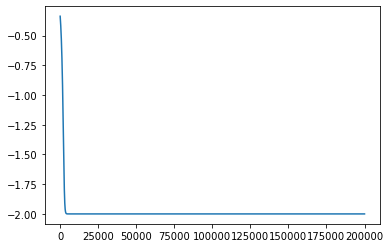

In [123]:
X2 = np.array([[1, 0, 0, 0], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 1]]).reshape(4, 4)

n1 = 4
n2 = 2
n3 = 17

w1 =  np.random.randn(n1, n2)
w2 =  np.random.randn(n2, n3)

loss =[]
for i in range(200000):    
    z2, a2 = forward(X2, w1)
    #print(a2.shape)
    z3, a3 = forward(a2, w2)
    #print(a3.shape)
    #y_hat = zeroones(a3)
    dw1, dw2, delta3 = backward(X2, Y, a3, a2, w2, z2)
    loss.append(sum(delta3))
    #print(dw2.shape)
    #print(w2.shape)
    #print([w1, w2])
    w1 =update(w1, dw1, 0.001)  
    w2 =update(w2, dw2, 0.001)
  #  print(sum(w1))



plt.figure()
plt.plot(loss)

# Accuracy
#print (f'The predicted output is {a3}')
y_predicted = zeroones(a3)
print(a3)
print (f'The accuracy of the model is {ACC(y_predicted, Y)}')